In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import timedelta

In [2]:
# Load the sales data (adjust the file path as needed)
sales = pd.read_excel('./furniture.xlsx')
# Convert date columns to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['ship_date'] = pd.to_datetime(sales['ship_date'])

###  Calculate the total profit and profit margin for each region

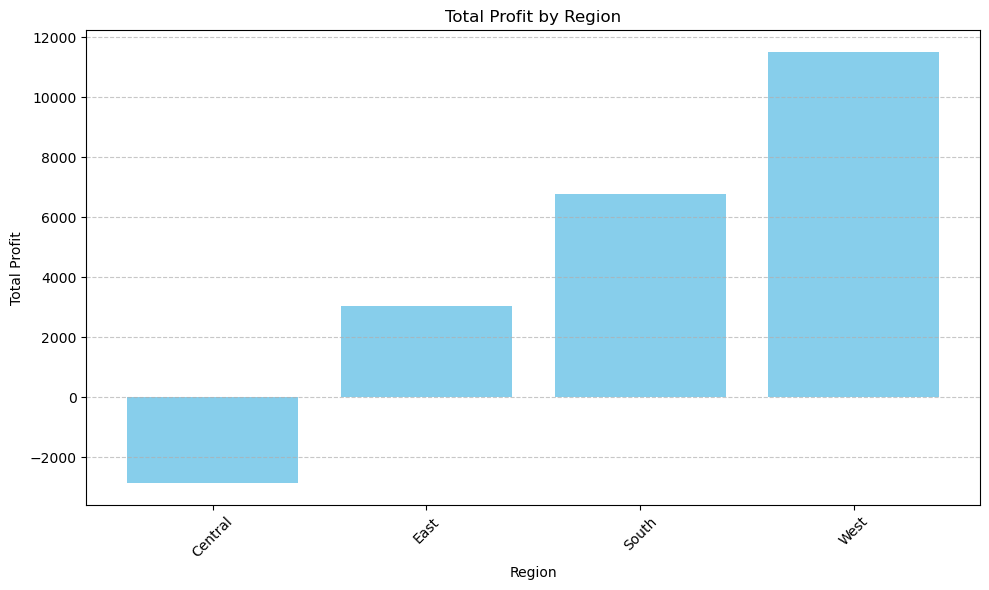

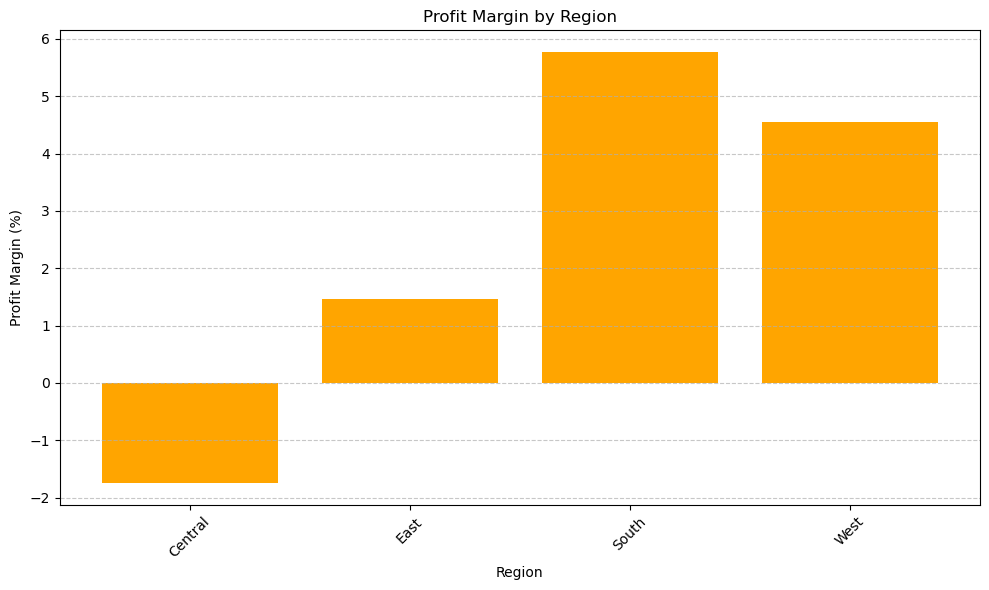

    region  total_profit  profit_margin
0  Central    -2871.0494      -1.752808
1     East     3046.1658       1.462455
2    South     6771.2061       5.772619
3     West    11504.9503       4.554382


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specified date range
filtered_data = sales[(sales['order_date'] >= '2020-01-06') & (sales['order_date'] <= '2023-12-30')]

# Group by region and calculate total profit and total sales
grouped_data = filtered_data.groupby('region').agg(
    total_profit=pd.NamedAgg(column='profit', aggfunc='sum'),
    total_sales=pd.NamedAgg(column='total_sales', aggfunc='sum')
)

# Calculate profit margin
grouped_data['profit_margin'] = (grouped_data['total_profit'] / grouped_data['total_sales']) * 100

# Reset index for displaying
grouped_data = grouped_data.reset_index()

# Plot total profit by region
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['region'], grouped_data['total_profit'], color='skyblue')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot profit margin by region
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['region'], grouped_data['profit_margin'], color='orange')
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###  Rank regions by profitability and total sales volume

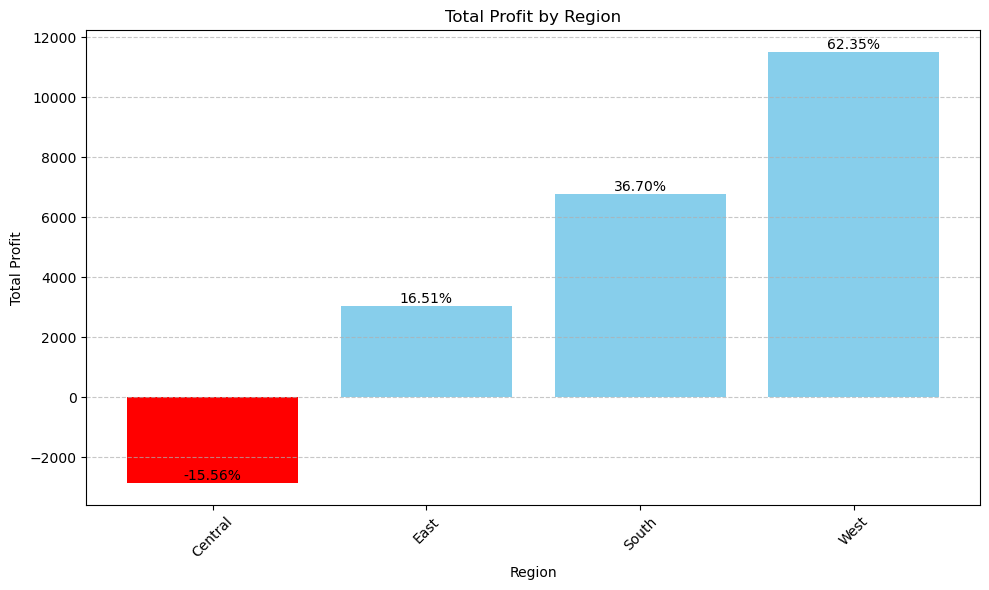

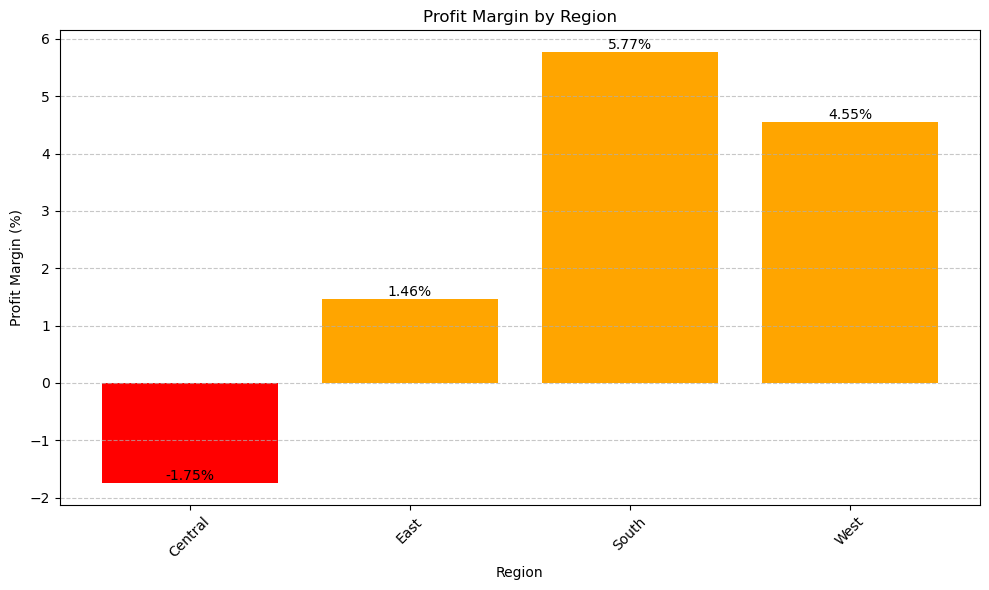

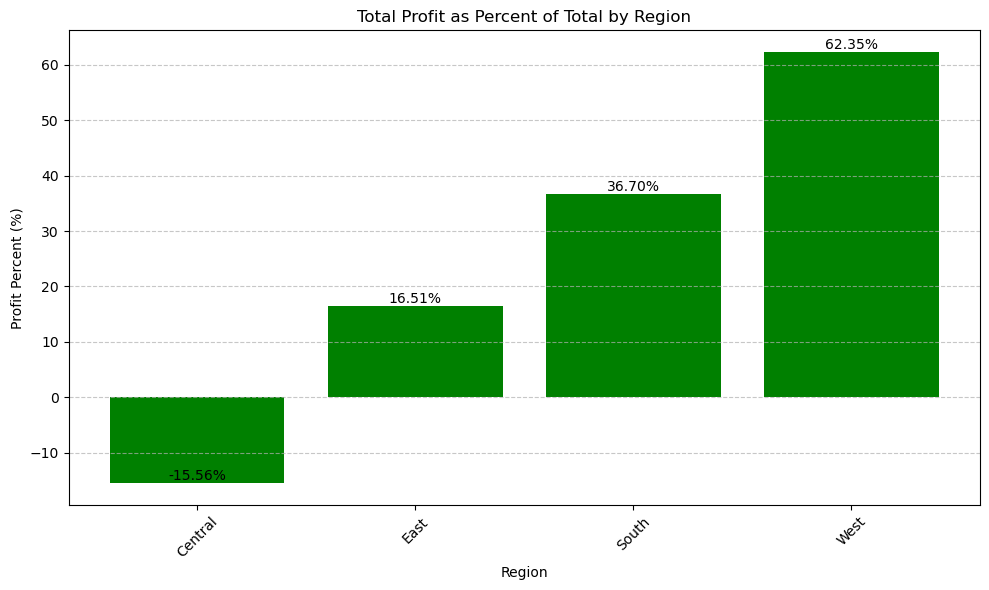

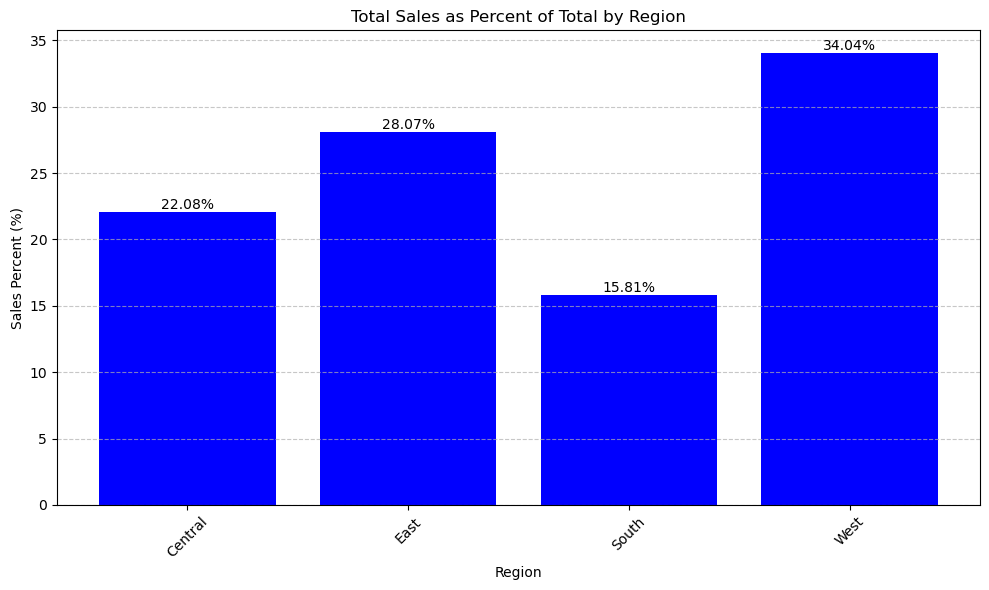

In [11]:
# Filter data for the specified date range
filtered_data = sales[(sales['order_date'] >= '2020-01-06') & (sales['order_date'] <= '2023-12-30')]

# Group by region and calculate total profit and total sales
grouped_data = filtered_data.groupby('region').agg(
    total_profit=pd.NamedAgg(column='profit', aggfunc='sum'),
    total_sales=pd.NamedAgg(column='total_sales', aggfunc='sum')
)

# Calculate profit margin and percentages
grouped_data['profit_margin'] = (grouped_data['total_profit'] / grouped_data['total_sales']) * 100
total_profit = grouped_data['total_profit'].sum()
total_sales = grouped_data['total_sales'].sum()
grouped_data['profit_percent'] = (grouped_data['total_profit'] / total_profit) * 100
grouped_data['sales_percent'] = (grouped_data['total_sales'] / total_sales) * 100

# Rank regions by total profit and total sales volume
grouped_data['profit_rank'] = grouped_data['total_profit'].rank(ascending=False, method='dense')
grouped_data['sales_rank'] = grouped_data['total_sales'].rank(ascending=False, method='dense')

# Reset index for plotting
grouped_data = grouped_data.reset_index()

# Plot total profit by region
plt.figure(figsize=(10, 6))
colors = ['red' if profit < 0 else 'skyblue' for profit in grouped_data['total_profit']]
bars = plt.bar(grouped_data['region'], grouped_data['total_profit'], color=colors)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot profit margin by region
plt.figure(figsize=(10, 6))
colors = ['red' if margin < 0 else 'orange' for margin in grouped_data['profit_margin']]
bars = plt.bar(grouped_data['region'], grouped_data['profit_margin'], color=colors)
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_margin']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot total profit percent by region
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['region'], grouped_data['profit_percent'], color='green')
plt.title('Total Profit as Percent of Total by Region')
plt.xlabel('Region')
plt.ylabel('Profit Percent (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['profit_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot total sales percent by region
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['region'], grouped_data['sales_percent'], color='blue')
plt.title('Total Sales as Percent of Total by Region')
plt.xlabel('Region')
plt.ylabel('Sales Percent (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to bars
for bar, label in zip(bars, grouped_data['sales_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


###  Identify regions with declining sales and provide insights on potential causes.

### Analyze which product categories and sub-categories are most profitable in each region.

### Create a report that recommends regions for increased marketing investment based on  profitability and sales growth potential.

--- The end ---